In [2]:
from workflow.fasttree_marker_analysis.random_e_analyse_decorated_get_parent_bs import FastTreeMarkerAnalyseDecoratedRandomGetParentBs
import seaborn as sns
from workflow.fasttree_marker_analysis.random_f_analyse_decorated_get_marker_counts import FastTreeMarkerAnalyseDecoratedRandomGetMarkerCounts
import matplotlib.pyplot as plt
import pandas as pd
from workflow.config import R207_BAC120_HMM


In [3]:
DF = FastTreeMarkerAnalyseDecoratedRandomGetMarkerCounts(target_pct=50).output().maybe_read_cached()
DF.head()

,batch_id,set,gid,original_markers,new_markers,jaccard
0,0,congruent,GCA_000155715.1,PF00380.20|PF00410.20|PF00466.21|PF00687.22|PF...,PF00380.20|PF01025.20|PF02576.18|PF03726.15|TI...,0.291667
1,0,congruent,GCA_000196815.1,PF00380.20|PF00410.20|PF00466.21|PF00687.22|PF...,PF00380.20|PF00410.20|PF00466.21|PF00687.22|PF...,1.000000
2,0,congruent,GCA_000209465.1,PF00380.20|PF00410.20|PF00466.21|PF00687.22|PF...,PF00410.20|PF01000.27|PF01025.20|TIGR00059|TIG...,0.327731
3,0,congruent,GCA_000218705.1,PF00410.20|PF00466.21|PF00687.22|PF01000.27|PF...,PF00410.20|PF00466.21|PF00687.22|PF01000.27|PF...,1.000000
4,0,congruent,GCA_000238815.2,PF00380.20|PF00410.20|PF00466.21|PF00687.22|PF...,PF00380.20|TIGR00020|TIGR00054|TIGR00083|TIGR0...,0.385246


In [4]:
R207_BAC_MARKERS = frozenset(R207_BAC120_HMM)

In [5]:
def calc_markers_lost_gained():

    rows = list()
    for row in DF.itertuples():
        og_markers = set(row.original_markers.split('|'))
        new_markers = set(row.new_markers.split('|'))

        og_markers = og_markers.intersection(R207_BAC_MARKERS)
        new_markers = new_markers.intersection(R207_BAC_MARKERS)

        same_markers = og_markers.intersection(new_markers)
        markers_gained = new_markers - same_markers
        markers_lost = og_markers - same_markers

        rows.append({
            'batch_id': row.batch_id,
            'set': row.set,
            'gid': row.gid,
            'n_lost': len(markers_lost),
            'n_gained': len(markers_gained),
            'jacc': row.jaccard,
            'n_remain': len(new_markers),
            'pct_lost': len(markers_lost) / len(og_markers) * 100,
            'pct_gained': len(markers_gained) / len(og_markers) * 100,
            'pct_remain': len(new_markers) / len(og_markers.union(new_markers)) * 100,
        })

    return pd.DataFrame(rows)

DF_MARKERS_GAINED_LOST = calc_markers_lost_gained()
DF_MARKERS_GAINED_LOST.head()

,batch_id,set,gid,n_lost,n_gained,jacc,n_remain,pct_lost,pct_gained,pct_remain
0,0,congruent,GCA_000155715.1,83,0,0.291667,35,70.338983,0.000000,29.661017
1,0,congruent,GCA_000196815.1,0,0,1.000000,118,0.000000,0.000000,100.000000
2,0,congruent,GCA_000209465.1,78,1,0.327731,39,67.241379,0.862069,33.333333
3,0,congruent,GCA_000218705.1,0,0,1.000000,106,0.000000,0.000000,100.000000
4,0,congruent,GCA_000238815.2,73,0,0.385246,47,60.833333,0.000000,39.166667


In [6]:
DF_MARKERS_GAINED_LOST[DF_MARKERS_GAINED_LOST['pct_remain'] > 100.0]

,batch_id,set,gid,n_lost,n_gained,jacc,n_remain,pct_lost,pct_gained,pct_remain


<AxesSubplot:title={'center':'% of markers remaining after contigs removed'}, xlabel='set', ylabel='pct_remain'>

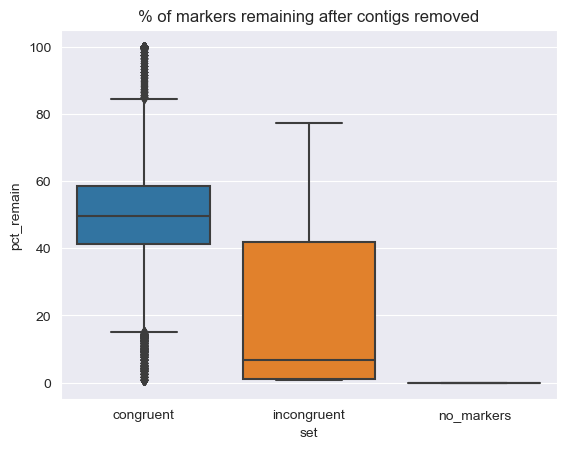

In [7]:
plt.title('% of markers remaining after contigs removed')
sns.boxplot(data=DF_MARKERS_GAINED_LOST, x='set', y='pct_remain')

<AxesSubplot:title={'center':'% of markers lost after contig removal'}, xlabel='set', ylabel='pct_lost'>

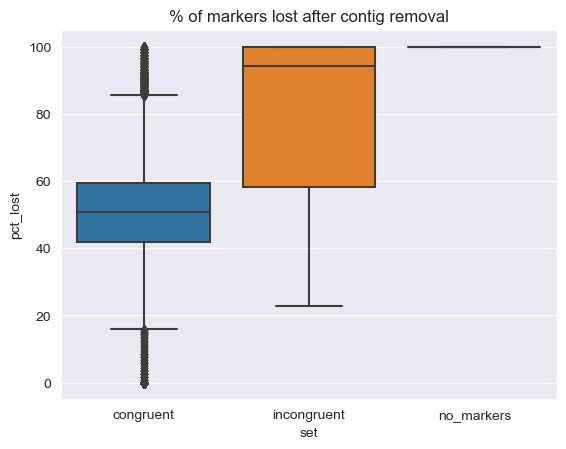

In [11]:
plt.title('% of markers lost after contig removal')
sns.boxplot(data=DF_MARKERS_GAINED_LOST, x='set', y='pct_lost')

<AxesSubplot:xlabel='set', ylabel='pct_gained'>

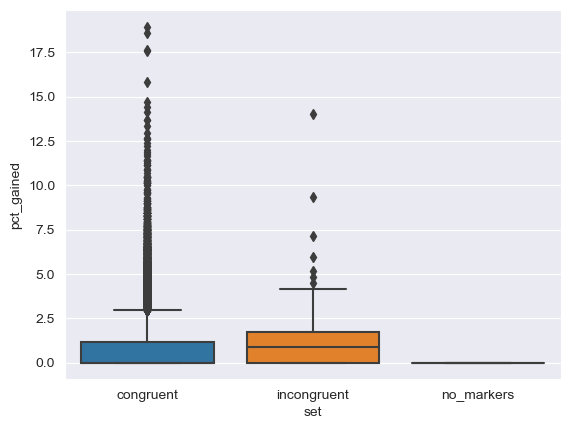

In [9]:
sns.boxplot(data=DF_MARKERS_GAINED_LOST, x='set', y='pct_gained')

<AxesSubplot:xlabel='set', ylabel='jacc'>

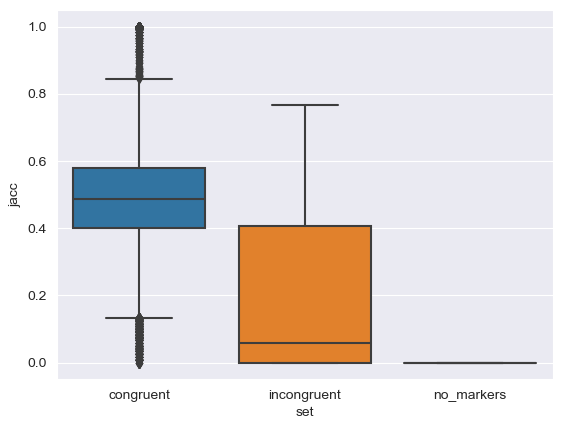

In [10]:
sns.boxplot(data=DF_MARKERS_GAINED_LOST, x='set', y='jacc')